# This exercise relates to the Household electricity usage data set for 50 U.S. states including Washington D.C. and Puerto Rico (income_elec_state). You have been asked to cluster all U.S. states by mean household income and mean household electricity usage. You have decided to use a k-means clustering algorithm.

In [1]:
load("income_elec_state.RData")

### a. Cluster the data and plot all 52 data points, along with the centroids. Mark all data points and centroids belonging to a given cluster with their own color. Here, let k=10.

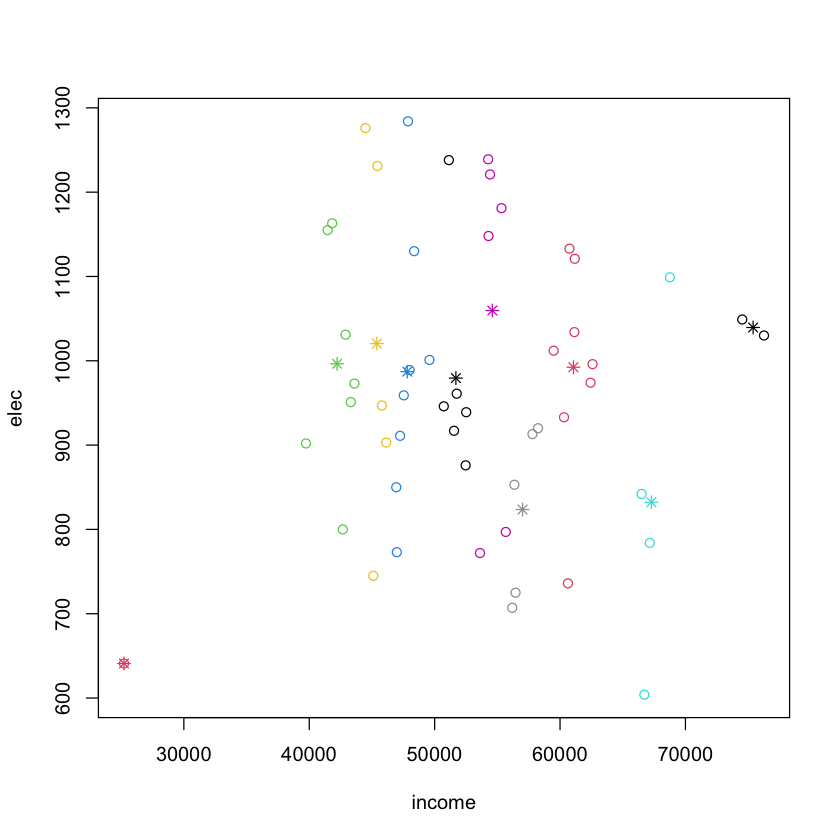

In [2]:
k = kmeans(income_elec_state, 10)
plot(income_elec_state, col = k$cluster)
points(k$centers, col=1:10, pch=8)

### b. Repeat step (a) several times. What can change each time you cluster the data? Why? How do you prevent these changes from occurring?

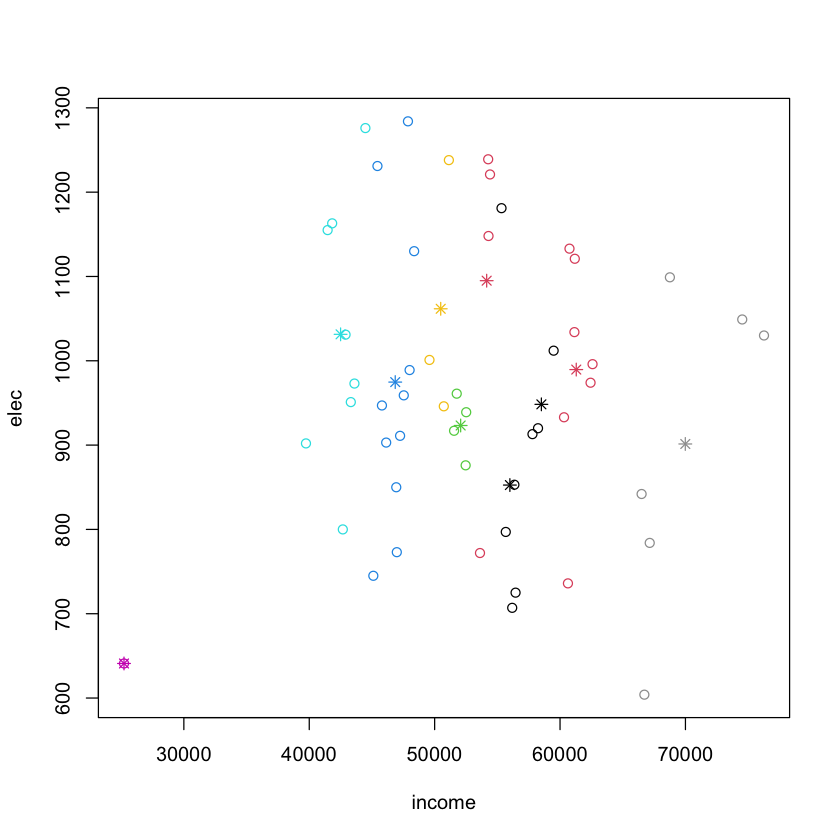

In [3]:
k = kmeans(income_elec_state, 10)
plot(income_elec_state, col = k$cluster)
points(k$centers, col=1:10, pch=8)

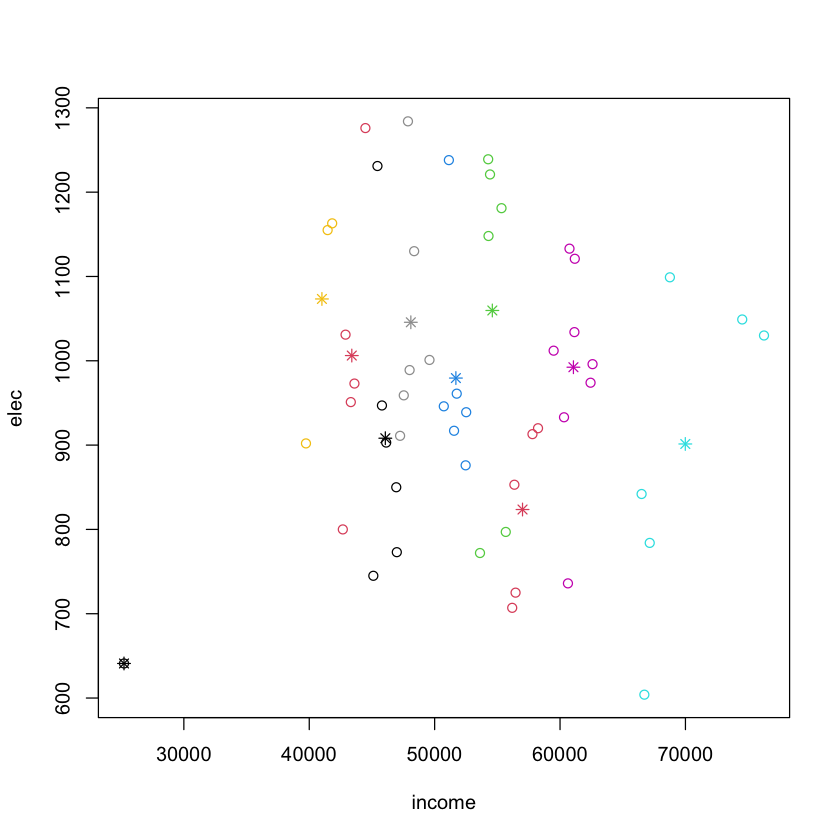

In [4]:
k = kmeans(income_elec_state, 10)
plot(income_elec_state, col = k$cluster)
points(k$centers, col=1:10, pch=8)

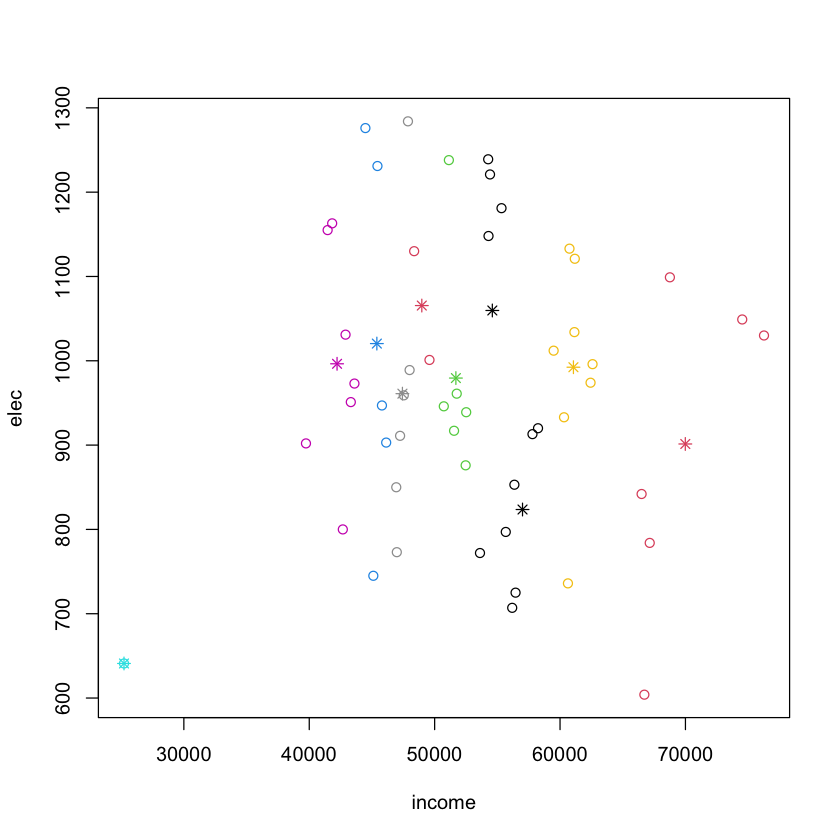

In [5]:
k = kmeans(income_elec_state, 10)
plot(income_elec_state, col = k$cluster)
points(k$centers, col=1:10, pch=8)

The things that can change are the sum of squares of the clusters, the position of the centers, the sizes. This happens becayse nstart= 1 and having 1 random starting set can result in different clusterings over multiple runs because the algorithm does not converges.

To prevent this we can:

- Increase "nstart" to improve the likelihood of obtaining the globally optimal clustering
- We can increase the "iter.max" parameter that reduces the likelihood that the kmeans cluster algo terminates prematurely

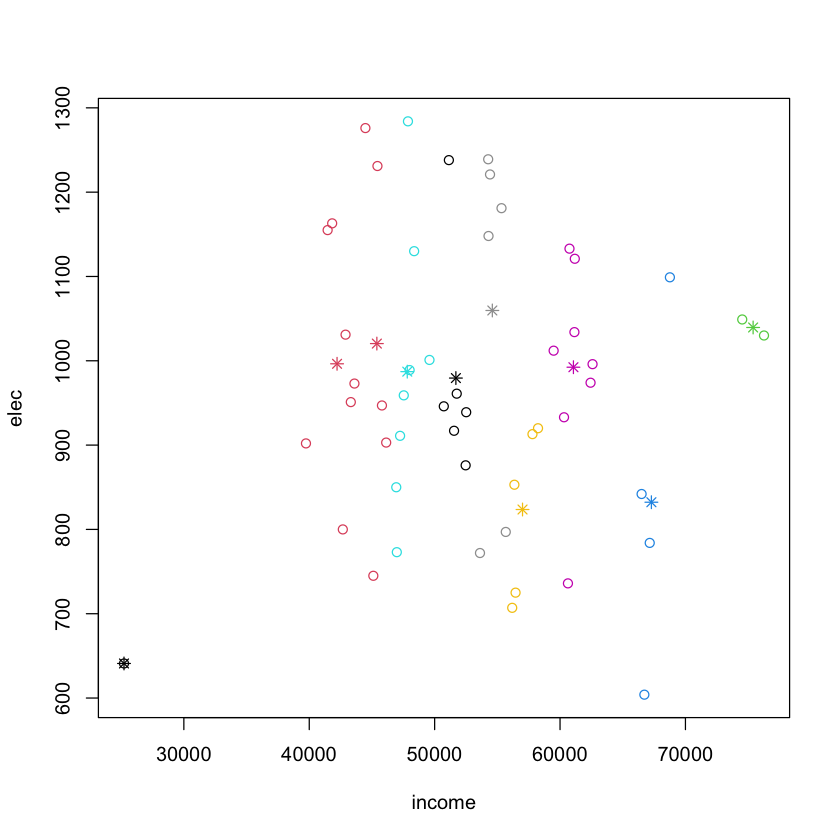

In [6]:
k = kmeans(income_elec_state, 10, nstart=100, iter.max = 50)
plot(income_elec_state, col = k$cluster)
points(k$centers, col=1:10, pch=8)

### c. Once you’ve accounted for the issues in the previous step, determine a reasonable value of k. Why would you suggest this value of k?

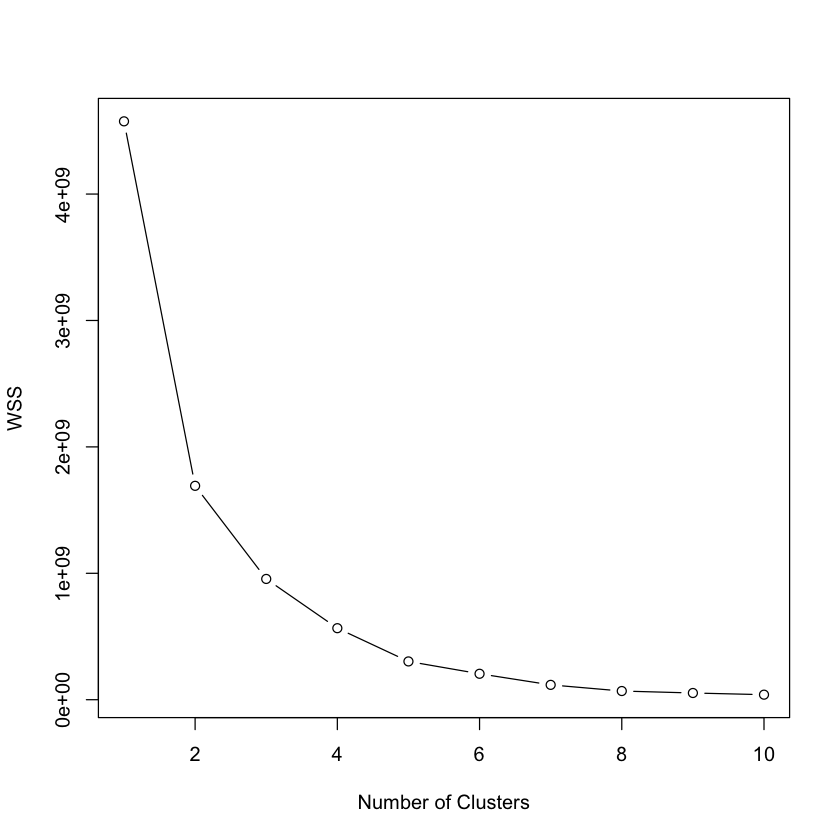

In [7]:
wss =numeric(10)
for (i in 1:10) wss[i] = sum(kmeans(income_elec_state, centers=i, nstart = 100, iter.max = 50)$tot.withinss)
plot(1:10, wss, type="b", xlab="Number of Clusters", ylab="WSS")

We can see that the elbow = 4. So, we can select 4 for the value of K

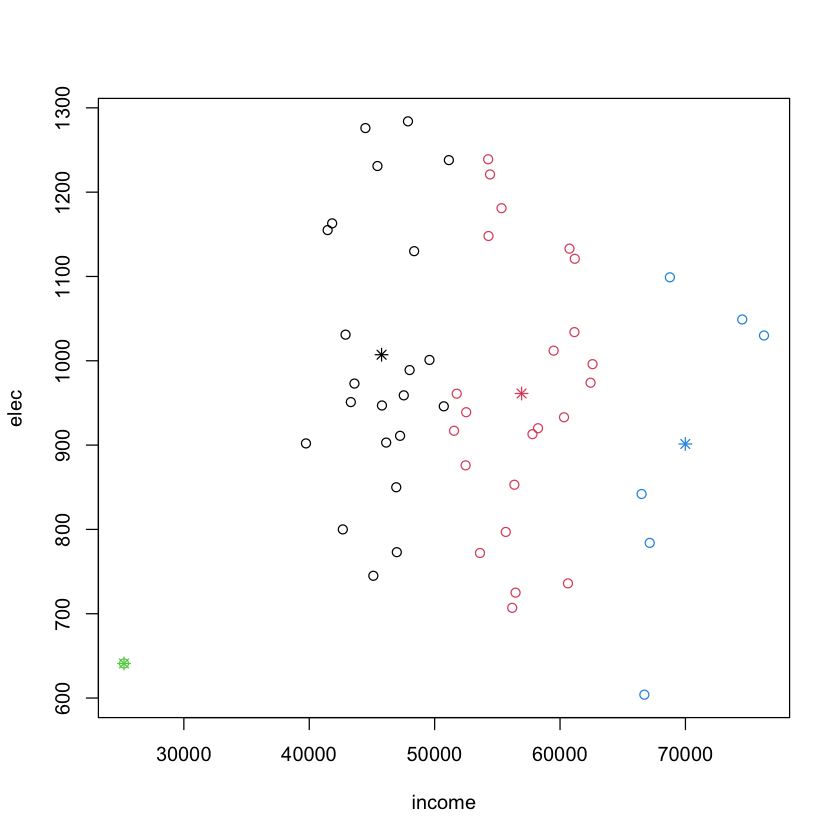

In [8]:
k = kmeans(income_elec_state, 4, nstart=100, iter.max = 50)
plot(income_elec_state, col = k$cluster)
points(k$centers, col=1:4, pch=8)

We can see that there is an outlier, this outlier is Puerto Rico, so it should perhaps belong to its own cluster. It is after all the smallest k such that PR belongs to its own cluster, so k = 4 would indeed be a good value to suggest. If we lower the k to 3, we will exclude PR.

### d. Convert the mean household income and mean electricity usage to a log10 scale and cluster this transformed dataset. How has the clustering changed? Why?

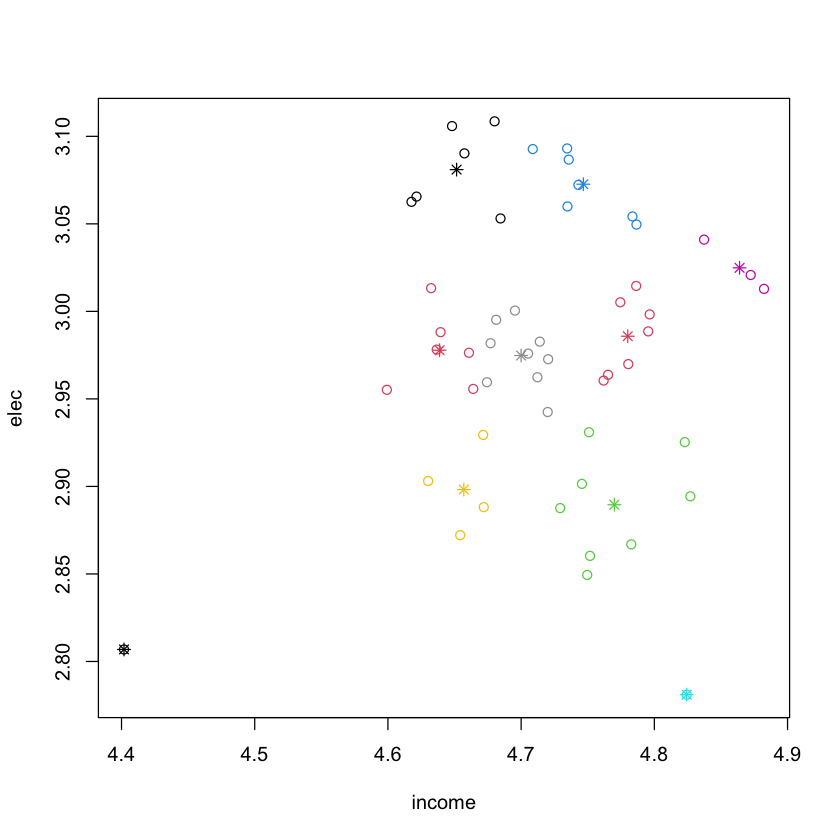

In [9]:
log_10_data = log10(income_elec_state)
k = kmeans(log_10_data, 10, nstart=100, iter.max = 50)
plot(log_10_data, col = k$cluster)
points(k$centers, col=1:10, pch=8)

The k-means clustering algorithm is not scale-incariant, so any adjustments to the units of the data may impact thge clustering.

### e. Reevaluate your choice of k. Would you now choose k differently? Why or why not?

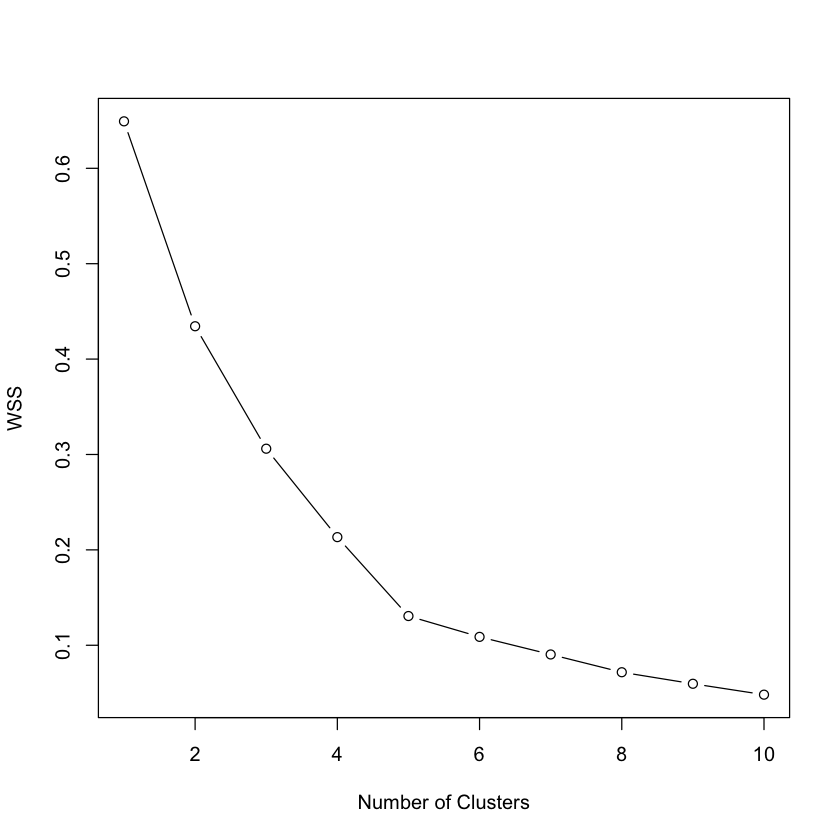

In [10]:
wss =numeric(10)
for (i in 1:10) wss[i] = sum(kmeans(log_10_data, centers=i, nstart = 100, iter.max = 50)$tot.withinss)
plot(1:10, wss, type="b", xlab="Number of Clusters", ylab="WSS")

We can see from the plot that now we have a more clear elbow position at: 5 so k=5

### f. Have you observed an outlier in the data? Remove the outlier and, once again, reevaluate your choice of k.

Yes, Puerto Rico is an outlier, so we will remove it and evaluate k

In [11]:
log_10_new <- subset(log_10_data, rownames(log_10_data) != "PR")

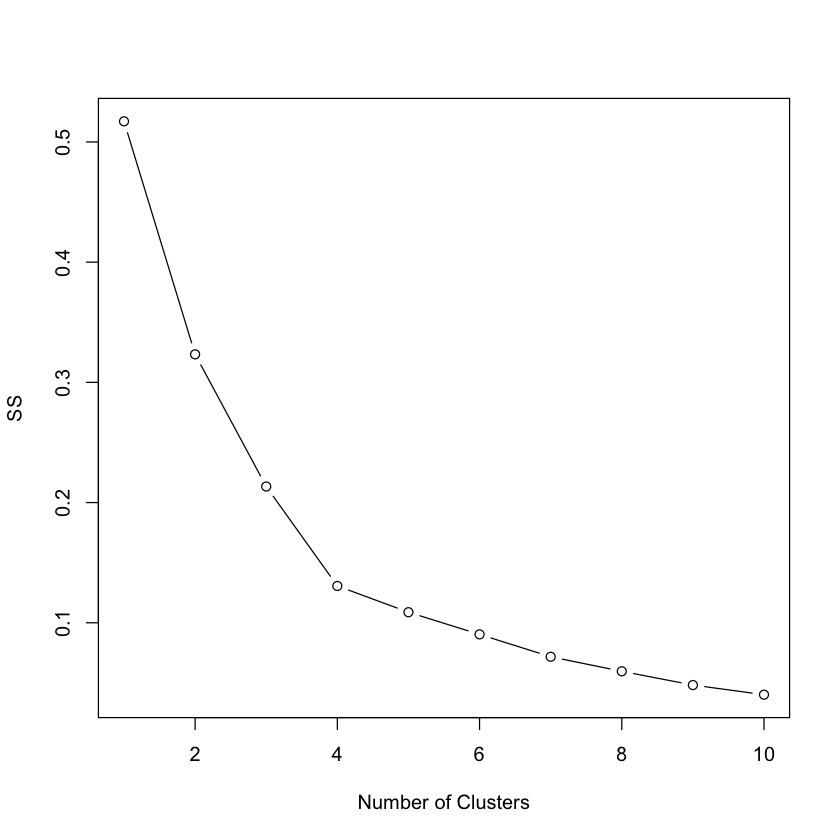

In [12]:
wss =numeric(10)
for (i in 1:10) wss[i] = sum(kmeans(log_10_new, centers=i, nstart = 100, iter.max = 50)$tot.withinss)
plot(1:10, wss, type="b", xlab="Number of Clusters", ylab="SS")

After we remove the outliner we can see from the elbow in the graph that k = 4 would be a reasonable choice of k

### g. Color a map of the U.S. according to the clustering you obtained. To simplify this task, use the “maps” package and color only the 48 contiguous states and Washington D.C.

In [14]:
install.packages("maps")


The downloaded binary packages are in
	/var/folders/66/vq3ykjx95j994mj5vw0jc58m0000gn/T//RtmpRr6gtB/downloaded_packages


In [15]:
library(maps)

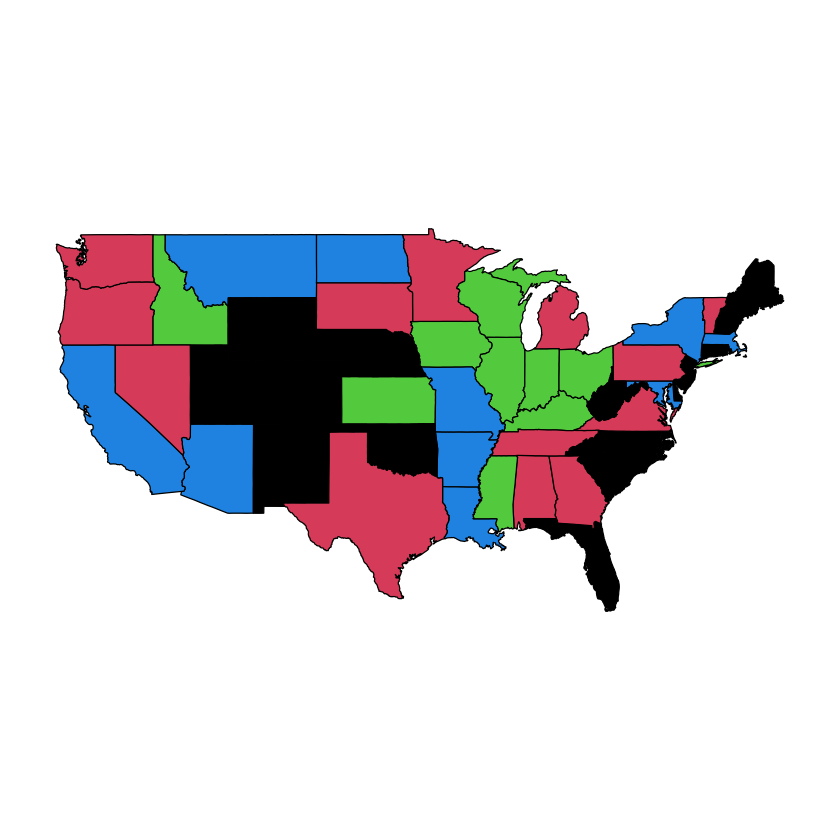

In [16]:
km <- kmeans(log_10_new,4,nstart = 100, iter.max = 50)
map_order <- c('NY', 'NC', 'NC', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
               'MD', 'MA', 'MA', 'MA', 'MI', 'MI', 'MN', 'MS', 'MO',
               'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
               'GA', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
               'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'VA',
               'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NY', 'NY',
               'VA', 'WA', 'WA', 'WA', 'WA', 'WA', 'WV', 'WI', 'WY')

map_color <- km$cluster[map_order]
map('state', col = map_color,fill=TRUE)